---
title: "Assignment 1"
author: "Sangwon Ju, SNU GSPA"
date: 'OCT/12/2022'
format: 
    html:
        code-overflow: wrap
        code-fold: true
categories:
   "Machine Learning & Deep Learning for Data Science (2022 Fall)" 
image: "image.png"
---

ML Basics, Regression, Probit, Logistic, Softmax, Ridge, Lasso (Score: 96/100)

# 0. Loading Packages

In [ ]:
# Loading Packages
import os
from IPython.display import display, Math, Latex
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import sklearn.linear_model as skl_lm
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import statsmodels.formula.api as smf

Reference Repositiory: https://github.com/JWarmenhoven/ISLR-python

# 1. Question 1
[30 pts] In this problem, you will use the Carseats data set attached in the assignment (Carseats.csv) for linear regression.


## Loading Dataset

In [ ]:
# Set Work Directory
print("Before Directory: %s"%os.getcwd())
os.chdir("E:/OneDrive - SNU/r")
print("After Directory: %s"%os.getcwd())

Before Directory: e:\OneDrive - SNU\(B) 대학원\수업\2022 2학기\데이터사이언스를위한머신러닝과딥러닝\과제1
After Directory: E:\OneDrive - SNU\r


In [ ]:
# Read Dataset
carseats=pd.read_csv("Carseats.csv")
display(carseats.head(5))
# Check if there is missing value
print("Total missing variable: ",carseats.isnull().sum().sum()) # no missing value

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


Total missing variable:  0


In [ ]:
# Data types
carseats.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


## (a) 
[10 pts] Fit a multiple linear regression model to predict Sales using Price, Urban, and US. Report the R2 of the model.

In [ ]:
# Sales: float, Price: income, Urban and US: Categorical variable
carseats.US=pd.Categorical(carseats.US, categories=["No", "Yes"])
carseats.Urban=pd.Categorical(carseats.Urban, categories=["No", "Yes"])


In [ ]:
# Fit a multiple linear regression model
estimate = smf.ols('Sales ~  Urban + US + Price', carseats).fit()
estimate.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Sun, 09 Oct 2022   Prob (F-statistic):           2.39e-23
Time:                        09:07:43   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0435      0.651     20.036      0.000      11.764      14.323
Urban[T.Yes]    -0.0219      0.272     -0.081      0.936      -0.556       0.512
US[T.Yes]        1.2006      0.259      4.635      0.000       0.691       1.710
Price           -0.0545      0.005    -10.389      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Report R^2 of the model
print('R^2: ', round(estimate.rsquared,3))

R^2:  0.239


## (b) 
[5 pts] Write out the model in equation form, being careful to handle the qualitative variables properly. Provide an interpretation of each coefficient in the model.

$$ Y= \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3 + \epsilon \,, \epsilon \sim \,iid  \, N(0,\sigma^2)  $$ 
$$ E(Y)= 13.0435 - 0.0219 X_1 + 1.2006 X_2 - 0.0545 X_3 $$ 

where

$$ Y = Sales $$

$$ \begin{equation*}
X_1 = \begin{cases}
             1  & \text{if }\,Urban=Yes \\
             0  & \text{if }\,Urban=No
       \end{cases} 
\end{equation*}
$$

$$
\begin{equation*}
X_2 = \begin{cases}
             1  & \text{if }\,US=Yes \\
             0  & \text{if }\,US=No
       \end{cases} 
\end{equation*} 
$$

$$ X_3 = Price $$

* Interpreation of the coefficient
1. $\beta_0$ 13.0435: The overall average value of the Sales is 13.0435, if all other variables are equal to zero ( $ X_1,\, X_2,\, X_3 =0$ )
2. $\beta_1$ -0.0219: The average Sales difference between Urban and Non Urban customers is estimated as -0.0219. (Even though the point estimates of the regression coefficient not equal to zero, the parameter estimate is not statistically significant under significance level of 0.05. Can't reject null hypothesis of $\beta_1=0$)
3. $\beta_2$ 1.2006 : The average Sales difference between US and Non US customers is estimated as 1.2006.
4. $\beta_3$ -0.0545 : Under $X_1,\, X_2$ (Urban and US dummy) are controlled, the one unit increase in Price results in -0.545 unit of Sales decrease. 

## (c)
[5 pts] For which predictor variable j can you reject the null hypothesis H0 : $β_j$ =
0? for which there is evidence of association with the outcome.


* Under the significance level of 0.05, the parameter $\beta_1$ estimate for the variable $X_1$ (Urban or Non-Urban) is not statistically significant as p-value is over 0.05 (0.936) and t-statistic is under critical region.

* Null: $H_0$: $\beta_1$ = 0
* Alternative: $H_0$: $\beta_1$ $\neq$ 0

## (d)
[10 pts] Obtain 95% confidence intervals for the coefficient(s).

In [ ]:
estimate.conf_int(alpha=0.05, cols=None).rename({0: 'Lower CI', 1: 'Upper CI'}, axis='columns')

,Lower CI,Upper CI
Intercept,11.763597,14.323341
Urban[T.Yes],-0.555973,0.512141
US[T.Yes],0.691304,1.709841
Price,-0.064764,-0.044154


# 2. Question 2
In class, we used the example of the logistic regression model to predict the probability of default using income and balance on the Default data set attached in the assignment (Default.csv). In this problem, we will estimate the test error of this logistic regression model using the validation set approach. Do not forget to set a random seed before beginning your analysis.

## Loading Dataset

In [ ]:
import random
random.seed(2022)

# Read Dataset
default=pd.read_csv("Default.csv")
display(default.head(5))
# Check if there is missing value
print("Total missing variable: ", default.isnull().sum().sum()) # no missing value

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


Total missing variable:  0


## (a)
[10 pts] Fit a logistic regression model that uses income and balance to predict default. Report the log-likelihood of the model.

In [ ]:
default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


In [ ]:
display(default['default'].value_counts())
display(default['student'].value_counts())

No     9667
Yes     333
Name: default, dtype: int64

No     7056
Yes    2944
Name: student, dtype: int64

In [ ]:
# Make dummy variable - No=0, Yes=1
default.default=pd.get_dummies(default.default, drop_first=True)
default.student=pd.get_dummies(default.student, drop_first=True)
display(default['default'].value_counts())
display(default['student'].value_counts())

0    9667
1     333
Name: default, dtype: int64

0    7056
1    2944
Name: student, dtype: int64

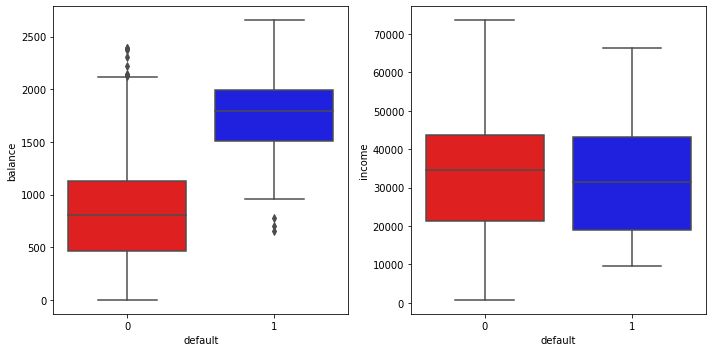

In [ ]:
fig = plt.figure(figsize=(10,5))
gs = mpl.gridspec.GridSpec(1, 2)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

pal = {0 :'red', 1:'blue'}
sns.boxplot(x='default', y='balance', data=default, orient='vertical', ax=ax1, palette=pal)
sns.boxplot(x='default', y='income', data=default, orient='vertical', ax=ax2, palette=pal)
gs.tight_layout(plt.gcf())



In [ ]:
estimate2 = smf.logit('default ~  income + balance', data=default).fit()
estimate2.summary()

Optimization terminated successfully.
         Current function value: 0.078948
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Sun, 09 Oct 2022   Pseudo R-squ.:                  0.4594
Time:                        09:07:44   Log-Likelihood:                -789.48
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                4.541e-292
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.5405      0.435    -26.544      0.000     -12.393     -10.688
income      2.081e-05   4.99e-06      4.174      0.000     1.1e-05    3.06e-05
balance        0.0056      0.000     24.835      0.000       0.005       0.006
==============================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [ ]:
print("Log-likelihood of logit model: ", round(estimate2.llf,3))

Log-likelihood of logit model:  -789.483


In [ ]:
estimate2.params

Intercept   -11.540468
income        0.000021
balance       0.005647
dtype: float64

In [ ]:
# Calculate Odds
odds_ratio = pd.DataFrame( {"Odds Ratio": estimate2.params,"Lower CI": estimate2.conf_int()[0],"Upper CI": estimate2.conf_int()[1]})
odds_ratio = np.exp(odds_ratio)
display (odds_ratio)
intercept=odds_ratio.iloc[0,0]
P = (intercept) / (1 + intercept) 
print("p_o: ", round(P,15)) 

,Odds Ratio,Lower CI,Upper CI
Intercept,0.000010,0.000004,0.000023
income,1.000021,1.000011,1.000031
balance,1.005663,1.005215,1.006111


p_o:  9.728234005e-06


In [ ]:
odds_ratio.iloc[0,0]

9.728328644686842e-06

## (b) 
[5 pts] Write out the model in equation form and provide an interpretation of each coefficient in the trained model.

$$ P(Y=1|X_1, X_2) = p = \frac{\exp(\beta_0 + \beta_1 X_1 + \beta_2 X_2 )}{1 + \exp (\beta_0 + \beta_1 X_1 + \beta_2 X_2 )}  $$ 
$$ \ln(\frac{p}{1-p}) = \beta_0 + \beta_1 X_1 + \beta_2 X_2  = -11.5405 + 0.00002 X_1 + 0.0056 X_2  $$

where

$$
\begin{equation*}
Y = \begin{cases}
             1  & \text{if }\,Default=Yes \\
             0  & \text{if }\,Default=No \\
       \end{cases} 
\end{equation*} \quad
$$
$$
X_1 = Income,\,X_2 = Balance
$$


* Interpreation of the coefficient
1. $\beta_0$= -11.5405 (odds ratio: 0.000010): The probability of having the outcome Default is 0.00000972823, if all other variables are equal to zero ($ X_1, \, X_2 = 0 $) 
2. $\beta_1$= 0.00002 (odds ratio: 1.000021): The one unit increase in Income, results in 1.000021 times increase in odds ratio of Default (increases odds of default by 0.0021%)
3. $\beta_2$= 0.0056 (odds ratio: 1.005663): The one unit increase in Balance, results in 1.005663 times increase in odds ratio of Default (increases odds of default by 0.5663%)

## (c) 
[5 pts] Perform 5-fold cross-validation using the model in Part (a), and estimate the test error of this model.

In [ ]:
x = np.array(default.loc[ : , ['income','balance']]) # make array
y = default.loc[:,'default']

# Five-Fold cross-validation
k_fold=KFold(n_splits = 5, shuffle = True, random_state=2022)

Test error was calculated using Mean Squared Error
$$ \text {Test Error of 5 folds: } CV_5 = \sum_{k=1}^{5} \frac{n_k}{n} MSE_k $$


In [ ]:
test_error = []

for train_index, test_index in k_fold.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model = LogisticRegression() # Logistic Regression
    model.fit(x_train, y_train) # Model Training
    y_test_pred = model.predict(x_test) 
    test_error.append(1-accuracy_score(y_test_pred, y_test)) # Test Error of each five folds

# Estimating Test Error
print("The test error of each five folds: ", np.round(test_error,3))

The test error of each five folds:  [0.031 0.025 0.026 0.029 0.031]


In [ ]:
model = LogisticRegression() # Logistic Regression
test_error=cross_val_score(model, x, y, cv=k_fold, scoring='neg_mean_squared_error', n_jobs=-1)


In [ ]:
size=[]
for train_index, test_index in k_fold.split(x):
    size.append(np.size(test_index))
print("The observations per each split: ", size)

# Using formula
testerror=[]
for folds in np.arange(0,5):
    testerror.append(np.negative(test_error)[folds]*size[folds])
testerrorvalue=round(sum(testerror)/len(default),4)
print("Test error of cross validation", testerrorvalue)

The observations per each split:  [2000, 2000, 2000, 2000, 2000]
Test error of cross validation 0.0286


## (d)
[10 pts] Now consider a logistic regression model that predicts the probability of default using income, balance, and a dummy variable for student. Estimate the test error for this model using the 5-fold cross-validation set approach. Comment on whether or not including a dummy variable for student would lead to a reduction in the test error rate.


In [ ]:
x1 = default.loc[ : , ['income','balance','student']] # make array
y1 = default.loc[:,'default']

# Five-Fold cross-validation
k_fold=KFold(n_splits = 5, shuffle = True,random_state=2022)

In [ ]:
model = LogisticRegression() # Logistic Regression
test_error_withstu=cross_val_score(model, x1, y1, cv=k_fold, scoring='neg_mean_squared_error', n_jobs=-1)

In [ ]:
size=[]
for train_index, test_index in k_fold.split(x):
    size.append(np.size(test_index))
print("The observations per each split: ", size)

# Using formula
testerror=[]
for folds in np.arange(0,5):
    testerror.append(np.negative(test_error_withstu)[folds]*size[folds])
testerrorvalue_withstudents=round(sum(testerror)/len(default),4)
print("Test error of cross validation with students", testerrorvalue_withstudents)

The observations per each split:  [2000, 2000, 2000, 2000, 2000]
Test error of cross validation with students 0.0317


Including a dummy variable for student would lead to almost no change in the test error rate. 
- Firstly, the strong negative linear correlation between student and income is statistically significant. Since the two variables are linearly correlatedm, even if the varaible student is inserted to the model it would lead to minor improvement in model prediction. (most of the areas that variable student can explain is also can be explained by variable income) 
- Secondly, the model's predictive ability would be negatively affected by statistically learning from train-dataset. Being a student and whether client would be default is correlated and it is statistically significant. As we use generalized linear model there is high possibility that "multicollinearity" would make parameter estimate unstable.

- As expected, the test error value with student variable is little(0.0001) higher than without student varaible. 

In [ ]:
print("Test error of cross validation", testerrorvalue)
print("Test error of cross validation with students", testerrorvalue_withstudents)

# Correlation 
rho = default.corr()
pval = default.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [0.01,0.05,0.1] if x<=t]))
display(rho.round(2).astype(str) + p) 
# significant negative linear relationship between student and income (rho=-0.75)

# Model including student variable
estimate3 = smf.logit('default ~  income + balance + student', data=default).fit()
display(estimate3.summary2().tables[1])



Test error of cross validation 0.0286
Test error of cross validation with students 0.0317


,default,student,balance,income
default,1.0***,0.04***,0.35***,-0.02**
student,0.04***,1.0***,0.2***,-0.75***
balance,0.35***,0.2***,1.0***,-0.15***
income,-0.02**,-0.75***,-0.15***,1.0***


Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
Intercept,-10.869045,0.492273,-22.079320,4.995499e-108,-11.833882,-9.904209
income,0.000003,0.000008,0.369808,7.115254e-01,-0.000013,0.000019
balance,0.005737,0.000232,24.736506,4.331521e-135,0.005282,0.006191
student,-0.646776,0.236257,-2.737595,6.189022e-03,-1.109831,-0.183721


correlation 출처: https://stackoverflow.com/questions/25571882/pandas-columns-correlation-with-statistical-significance

# 3. Question 3
[40 pts] In this problem, you will predict the number of applications received using the other variables in the College data set attached in the assignment (College.csv).


## Loading Dataset

In [ ]:
#| column: screen-inset-shaded
import random
random.seed(2022)

# Read Dataset
college=pd.read_csv("College.csv")
display(college.head(5))
# Check if there is missing value
print("Total missing variable: ", college.isnull().sum().sum()) # no missing value

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


Total missing variable:  0


Randomly split the data set into a training set and a test set by 90:10 ratio. <br>
Data description: https://www.kaggle.com/faressayah/college-data 

In [ ]:
college.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

In [ ]:
# Make dummy variable - No=0, Yes=1
# Priavate: A factor with levels Yes and No indicating private or public university
college.Private=pd.get_dummies(college.Private, drop_first=True)
display(college['Private'].value_counts())

1    565
0    212
Name: Private, dtype: int64

In [ ]:
# Accept: Number of applications accepted
y=college.iloc[:,3]

# Sclaing - Standardization of Predictors
scaler = StandardScaler()  
train_col=np.array(college.columns)
x1 = college[np.delete(train_col,[0,3]).tolist()]

x=pd.DataFrame(scaler.fit_transform(x1[x1.columns[range(1,x1.shape[1])]].to_numpy()))
x.columns=x1.columns[range(1,x1.shape[1])]
x.insert(loc=0,column="Private", value=x1["Private"])

# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, shuffle=True)

Ridge: 
$$ \sum_{i=1}^{n} (y_i-\beta_0-\sum_{j=1}^p \beta_j x_{ij})^2 + \lambda \sum_{j=1}^p \beta_j^2 = RSS + \lambda \sum_{j=1}^p \beta_j^2 $$

Lasso: 
$$ \sum_{i=1}^{n} (y_i-\beta_0-\sum_{j=1}^p \beta_j x_{ij})^2 + \lambda \sum_{j=1}^p |\beta_j| = RSS + \lambda \sum_{j=1}^p |\beta_j| $$

In this sense, $\hat{\beta^R_{i,j}}$ will depend not only on the value of $\lambda$, but also on the scaling of the jth predictor (and other predictors). (RSS + $\beta$) <br>
Therefore, it is best to apply ridge regression after $standardizing\,the\,predictors$ using the formula 
$$\tilde{x_{ij}}=\frac{x_ij}{\sqrt{\frac{1}{n} \sum_{i=1}^n(\bar{x_{ij}}-\bar{x_j})^2}}$$ 
(ISLR, p. 239)

In [ ]:
# Dataframe Dimensions
print("# of rows: ", college.shape[0])
print("# of train rows: ", x_train.shape[0])
print("# of test rows: ", x_test.shape[0])

# of rows:  777
# of train rows:  699
# of test rows:  78


## (a)
[10 pts] Fit a linear model using least squares on the training set, and report the test error obtained.


The test error was calculated using Mean Squared Error
$$ MSE_{train} = \frac{1}{699} \sum_{i=1}^{699} (\hat{Y_i} - Y_i)^2$$
$$ MSE_{test} = \frac{1}{78} \sum_{i=1}^{78} (\hat{Y_i} - Y_i)^2$$ 


Linear Regression: scale equivariant - multiplying $X_j$ by a constant $c$ simply leads to a scale equivariant scaling of the least squares coefficient estimates by a factor of $\frac{1}{c}$. In other words, regardless of how the $j_th$ predictor is scaled, $X_{j}\beta_j$ will remain the same (ISLR, p. 239). Therefore, this assignment going to use standardized predictors for the model (for convenience).

In [ ]:
# Model 
regr=LinearRegression()

model_ols= regr.fit(x_train,y_train)

y_train_pred=model_ols.predict(x_train)
y_test_pred=model_ols.predict(x_test)

print("Training R squared: ", round(regr.score(x_train,y_train),3))
print("Test R squared: ", round(regr.score(x_test,y_test),3))

print("Training Error: ", round(np.mean((y_train_pred-y_train)**2),3))
print("Test Error: ", round(np.mean((y_test_pred-y_test)**2),3))
print("Test Error: ", round(mean_squared_error(y_test_pred,y_test),3)) # alternate way 

Training R squared:  0.952
Test R squared:  0.963
Training Error:  291415.502
Test Error:  192960.565
Test Error:  192960.565


## (b)
[10 pts] Fit a ridge regression model on the training set, with λ chosen by 10-fold cross-validation. Report the test error obtained.

In [ ]:
# ridge regression with default λ=1.0
ridreg = Ridge()
model_ridge=ridreg.fit(x_train, y_train)

y_train_pred=model_ridge.predict(x_train)
y_test_pred=model_ridge.predict(x_test)
print("Training Error: ", round(mean_squared_error(y_train_pred,y_train),3))  
print("Test Error: ", round(mean_squared_error(y_test_pred,y_test),3))

Training Error:  291472.521
Test Error:  191707.194


In [ ]:
# ridge regression with 10-fold cross validation
k_fold=KFold(n_splits = 10, shuffle = True, random_state=2022) # set random seed

# lambdas = np.arange(1,100, 1)
# lambdas = np.arange(1,20, 0.5) 
lambdas = np.arange(2,10, 0.1)   

# ridge
ridreg_cv = RidgeCV(alphas=lambdas, cv=k_fold) 
model_ridge_cv=ridreg_cv.fit(x_train, y_train)

y_train_pred=model_ridge_cv.predict(x_train)
y_test_pred=model_ridge_cv.predict(x_test)

print("Training Error (with 10 folds): ", round(mean_squared_error(y_train_pred,y_train),3))  
print("Test Error (with 10 folds): ", round(mean_squared_error(y_test_pred,y_test),3))

print("Training R Squared: ", round(r2_score(y_train, y_train_pred),2))
print("Testing R Squared: ", round(r2_score(y_test, y_test_pred),2))
print("Optimal Lambda: ", model_ridge_cv.alpha_)
print("Coefficients: ", model_ridge_cv.coef_)

Training Error (with 10 folds):  293156.156
Test Error (with 10 folds):  186375.172
Training R Squared:  0.95
Testing R Squared:  0.96
Optimal Lambda:  6.400000000000004
Coefficients:  [ 154.40316381 1606.59850184  942.98496287 -488.95762002  187.39331727
   63.85717783  -67.20841469  260.99875502  -16.86522954    4.24805295
  -32.17722811   75.26537243   12.02353776  -22.46635632  -83.30446315
 -161.72446977  -18.19291394]


In [ ]:
# Coefficients with λ=6.41
display(pd.DataFrame({"Variable":x_train.columns,"Coefficients":model_ridge_cv.coef_}))

,Variable,Coefficients
0,Private,154.403164
1,Apps,1606.598502
2,Enroll,942.984963
3,Top10perc,-488.957620
4,Top25perc,187.393317
5,F.Undergrad,63.857178
6,P.Undergrad,-67.208415
7,Outstate,260.998755
8,Room.Board,-16.865230
9,Books,4.248053


In [ ]:
# ridge regression with optimal λ=6.41
ridreg = Ridge(alpha=6.41)
model_ridge=ridreg.fit(x_train, y_train)

y_train_pred=model_ridge.predict(x_train)
y_test_pred=model_ridge.predict(x_test)
print("Training Error: ", round(mean_squared_error(y_train_pred,y_train),3))  
print("Test Error: ", round(mean_squared_error(y_test_pred,y_test),3))

Training Error:  293160.8
Test Error:  186366.688


## (c)
[10 pts] Fit a lasso model on the training set, with λ chosen by 10-fold crossvalidation. Report the test error obtained, along with the number of non-zero
coefficient estimates.

In [ ]:
# lasso regression with default λ=1.0
lassoreg = Lasso()
model_lasso=lassoreg.fit(x_train, y_train)

y_train_pred=model_lasso.predict(x_train)
y_test_pred=model_lasso.predict(x_test)
print("Training Error: ", round(mean_squared_error(y_train_pred,y_train),3))  
print("Test Error: ", round(mean_squared_error(y_test_pred,y_test),3))

Training Error:  291537.881
Test Error:  190072.628


In [ ]:
# ridge regression with 10-fold cross validation
k_fold=KFold(n_splits = 10, shuffle = True,random_state=2022) # set random seed
max_iter = 15000

# lambdas = np.arange(0.1,10,0.01) # Smallest Test Error calculated at 2.97 
lambdas = np.arange(4,50,0.1) 
    
lassoreg_cv = LassoCV(alphas=lambdas, cv=k_fold, max_iter=max_iter) 
model_lasso_cv=lassoreg_cv.fit(x_train, y_train)

y_train_pred=model_lasso_cv.predict(x_train)
y_test_pred=model_lasso_cv.predict(x_test)

print("Training Error (with 10 folds): ", round(mean_squared_error(y_train_pred,y_train),3))  
print("Test Error (with 10 folds): ", round(mean_squared_error(y_test_pred,y_test),3))

print("Training R Squared: ", round(r2_score(y_train, y_train_pred),2))
print("Testing R Squared: ", round(r2_score(y_test, y_test_pred),2))
print("Optimal Lambda: ", model_lasso_cv.alpha_)
print("Coefficients: ", model_lasso_cv.coef_)

Training Error (with 10 folds):  292747.201
Test Error (with 10 folds):  181011.81
Training R Squared:  0.95
Testing R Squared:  0.97
Optimal Lambda:  4.0
Coefficients:  [ 126.65222298 1632.17789857  979.5277818  -487.43215826  179.97073683
   -0.          -61.36589383  252.50632841   -8.20028126    0.
  -25.42427626   69.09512846    6.55921777  -15.98829039  -71.29649584
 -156.34592682  -13.15656712]


FYI: https://scikit-learn.org/stable/modules/grid_search.html#specifying-an-objective-metric <br>
By default, parameter search uses the score function of the estimator to evaluate a parameter setting. (sklearn.metrics.r2_score for regression)

Even though the 10-fold cross-validation r2 score is lowest when $\lambda=3$, I chose the lambda with less r2 score. Since the purpose of using lasso regression is selecting features (variable selection), lower lambdas are not estimating coefficients with 0. (so I used lambda with 4 which is closest to optimal lambda with some feature's coefficients are exactly equal to zero)

In [ ]:
# Coefficients with λ=4
coefs=pd.DataFrame({"Variable":x_train.columns,"Coefficients":np.round(model_lasso_cv.coef_,3)})
display(coefs)

print("Training Error (with 10 folds): ", round(mean_squared_error(y_train_pred,y_train),3))  
print("Test Error (with 10 folds): ", round(mean_squared_error(y_test_pred,y_test),3),"\n")


# Variables selected
print("Variables selected")
display(coefs[coefs['Coefficients']!=0]) 

print("Variables not selected")
display(coefs[coefs['Coefficients']==0].Variable.to_numpy())

,Variable,Coefficients
0,Private,126.652
1,Apps,1632.178
2,Enroll,979.528
3,Top10perc,-487.432
4,Top25perc,179.971
5,F.Undergrad,-0.000
6,P.Undergrad,-61.366
7,Outstate,252.506
8,Room.Board,-8.200
9,Books,0.000


Training Error (with 10 folds):  292747.201
Test Error (with 10 folds):  181011.81 

Variables selected


,Variable,Coefficients
0,Private,126.652
1,Apps,1632.178
2,Enroll,979.528
3,Top10perc,-487.432
4,Top25perc,179.971
6,P.Undergrad,-61.366
7,Outstate,252.506
8,Room.Board,-8.200
10,Personal,-25.424
11,PhD,69.095


Variables not selected


array(['F.Undergrad', 'Books'], dtype=object)

Coefficients of variable "F.Undergrad", "Books" are equal to zero with lambda 4

## (d)
[10 pts] Comment on the results obtained.   

- How accurately can you predict the number of college applications received? <br> 
- Is there much difference among the test errors resulting from these three approaches? <br>

| Methods | Score | Value |
| --- | --- | --- |
|OLS |Test Mean Squared Error |  192960.565 |
|Ridge | Test Mean Squared Error (with 10 folds) |  186366.688 |
|Lasso | Test Mean Squared Error (with 10 folds + variable selection) |  181011.81 |

The lowest mean squared error was calculated using Lasso regression with two variables' coeficients are equal to zero. The test error of Lasso is lower compared to OLS (11948.76), Ridge (6593.88).

- Which model would you use?

The ridge and lasso regression is a shirinkage methods that constrains and regularizes the coefficient estimates. It is true that these two models are improving the fit compared to OLS, but they are not without potential disadvantages. They comprised a unbiasedness of the OLS and reduce variance, which may result in overfitting. Therefore, with caution, the lasso regression would be selected. Lasso regression can be used as a techniques to selecting important predictors out of an comparatively less important predictors.